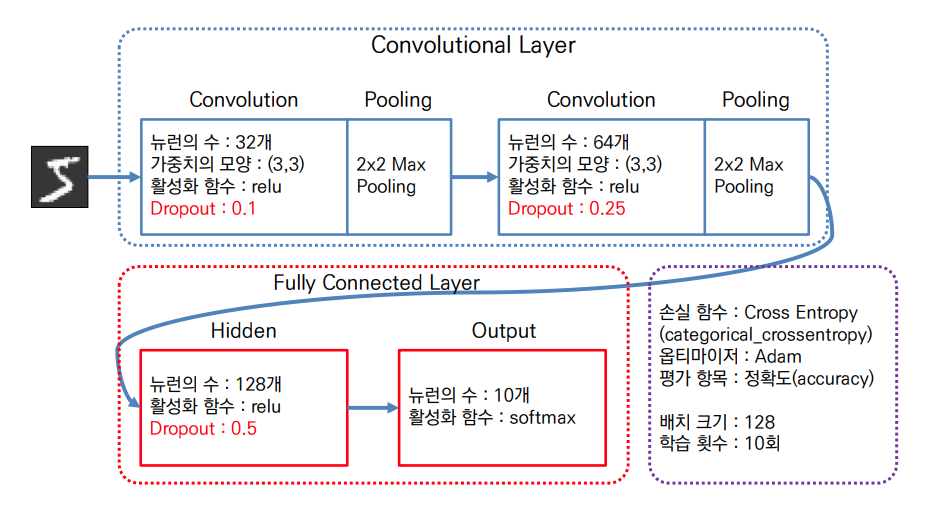

In [1]:
#모델 정의
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dense, Dropout, Flatten

model = Sequential()
model.add(Input(shape=(28,28,1)))
model.add(Conv2D(32,3, activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.1))

model.add(Conv2D(64, 3, activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

In [2]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [3]:
from tensorflow.keras.datasets import mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [4]:
train_X = train_X.reshape(-1, 28, 28, 1) / 255.0 #맨뒤에 채널 정보 (1)  255로 나누는건 0~1사이로 표준화를 위해
test_X = test_X.reshape(-1, 28, 28, 1) / 255.0

In [5]:
model.fit(train_X, train_y, validation_data=(test_X, test_y),
          batch_size=128, epochs=10, verbose=1)

Epoch 1/10
469/469 [==============================] - 14s 28ms/step - loss: 0.3285 - accuracy: 0.8995 - val_loss: 0.0629 - val_accuracy: 0.9797
Epoch 2/10
469/469 [==============================] - 13s 27ms/step - loss: 0.1065 - accuracy: 0.9679 - val_loss: 0.0385 - val_accuracy: 0.9875
Epoch 3/10
469/469 [==============================] - 13s 27ms/step - loss: 0.0802 - accuracy: 0.9766 - val_loss: 0.0318 - val_accuracy: 0.9893
Epoch 4/10
469/469 [==============================] - 13s 27ms/step - loss: 0.0679 - accuracy: 0.9793 - val_loss: 0.0287 - val_accuracy: 0.9900
Epoch 5/10
469/469 [==============================] - 13s 28ms/step - loss: 0.0560 - accuracy: 0.9829 - val_loss: 0.0297 - val_accuracy: 0.9894
Epoch 6/10
469/469 [==============================] - 13s 27ms/step - loss: 0.0513 - accuracy: 0.9846 - val_loss: 0.0266 - val_accuracy: 0.9906
Epoch 7/10
469/469 [==============================] - 13s 27ms/step - loss: 0.0471 - accuracy: 0.9854 - val_loss: 0.0253 - val_accuracy:

In [7]:
loss, accuracy = model.evaluate(test_X, test_y)

313/313 [==============================] - 1s 2ms/step - loss: 0.0214 - accuracy: 0.9933


In [8]:
print(loss, accuracy)

0.021378226578235626 0.9933000206947327


In [9]:
import numpy as np
pred = model.predict(test_X)
pred = np.argmax(pred, axis=1)

313/313 [==============================] - 1s 2ms/step


In [10]:
import pandas as pd
pd.crosstab(test_y, pred)

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,977,1,0,0,0,0,0,1,1,0
1,0,1135,0,0,0,0,0,0,0,0
2,1,0,1025,2,0,0,0,4,0,0
3,0,0,1,1006,0,2,0,0,1,0
4,0,0,0,0,980,0,0,0,0,2
5,0,0,0,5,0,886,1,0,0,0
6,1,2,0,0,1,4,950,0,0,0
7,0,3,4,2,0,1,0,1014,1,3
8,1,0,3,1,1,0,0,1,966,1
